#### Simple linear regression

reading the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
advertising = pd.read_csv('advertising.csv')

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


step 2 : Visualizing the data 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

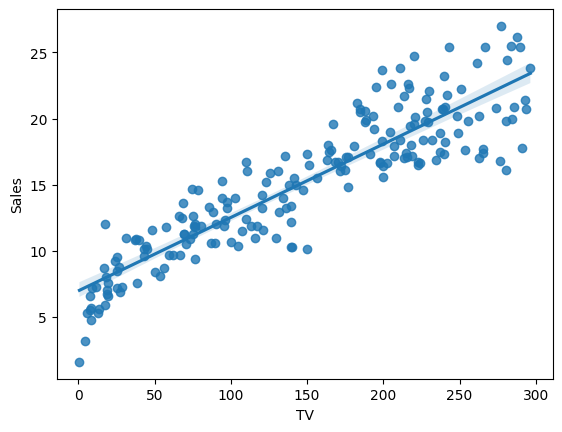

In [9]:
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

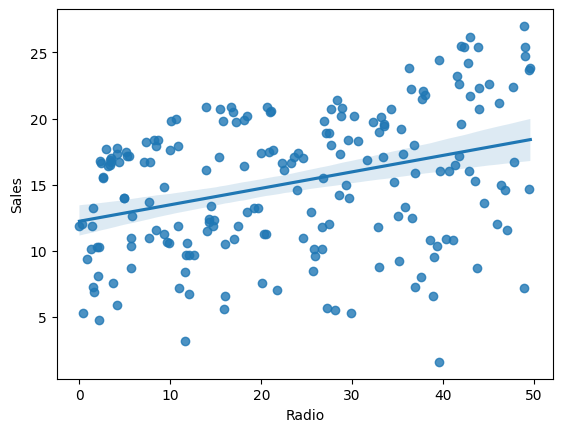

In [10]:
sns.regplot(x='Radio', y='Sales', data=advertising)

<Axes: xlabel='Newspaper', ylabel='Sales'>

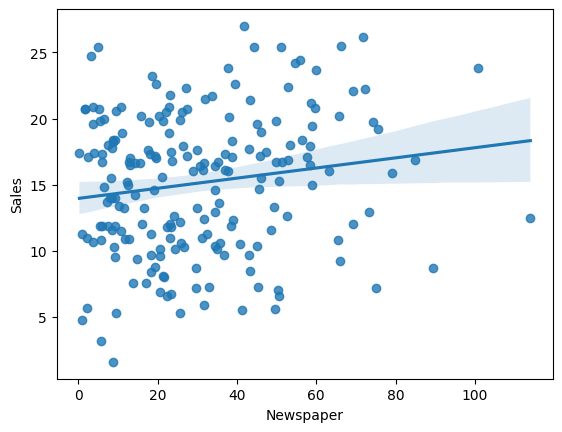

In [11]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

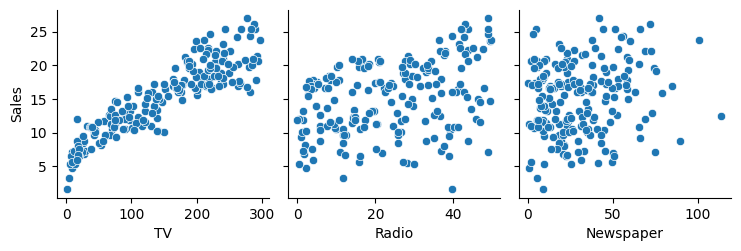

In [12]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [13]:
#heatmaps

In [14]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

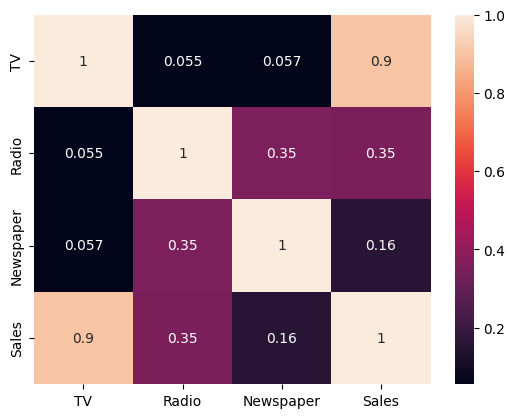

In [15]:
sns.heatmap(advertising.corr(), annot=True)

Step 3 : Performing Simple Linear Regression

y = m T.V +c

In [16]:
import statsmodels
import statsmodels.api as sm

In [17]:
import sklearn

In [18]:
TV = advertising['TV']
sales = advertising['Sales']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test= train_test_split(TV, sales, train_size=0.7, random_state=100)

In [21]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

Building a linear model

Simple linear regression : Sales = c + m.TV

In [23]:
X_train_sm = sm.add_constant(X_train)

In [24]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


Simple linear regression equation with constant added : Sales = c.const + m.TV

In [25]:
lr_obj = sm.OLS(y_train, X_train_sm)

In [26]:
lr = lr_obj.fit()

In [27]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [28]:
# sales = 6.948683 + 0.054546 * TV

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        18:03:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [30]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

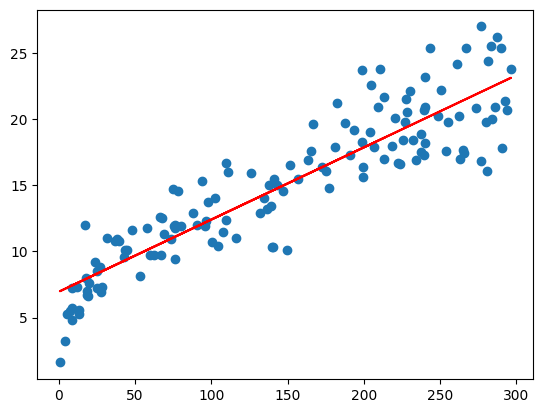

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

Residual analysis

In [32]:
res = y_train - y_train_pred
res.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

Distribution of error terms

<Axes: ylabel='Density'>

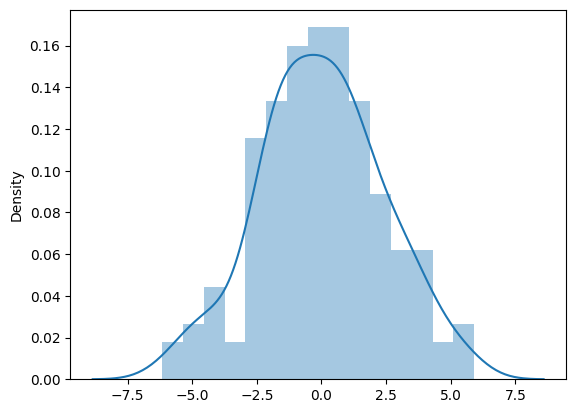

In [33]:
fig = plt.figure()
sns.distplot(res, bins=15)

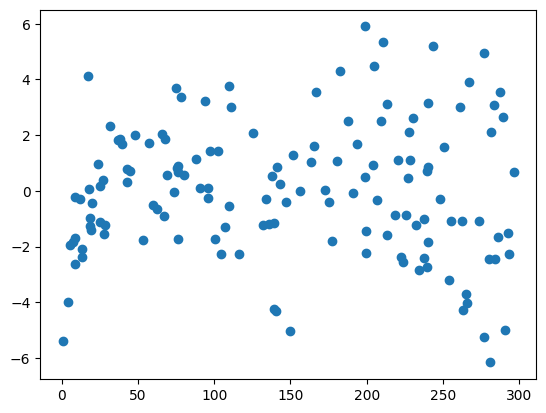

In [34]:
plt.scatter(X_train, res)

Predictions on the Test Set

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
X_test_sm = sm.add_constant(X_test)

In [37]:
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [38]:
y_pred = lr.predict(X_test_sm)

In [39]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

Checkint the R-squared value

In [41]:
r2_score(y_test, y_pred)

0.792103160124566

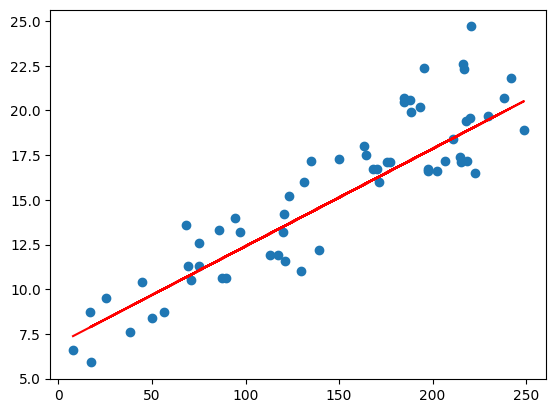

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

In [43]:
r = y_test - y_pred

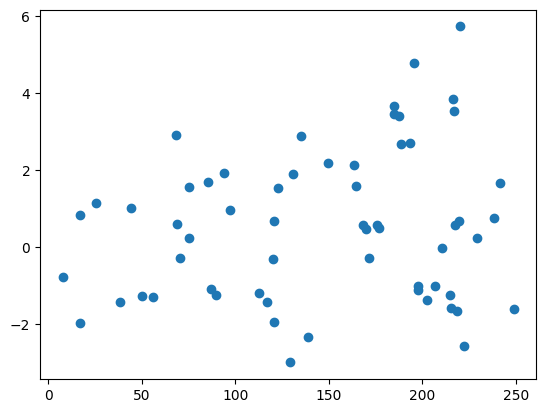

In [44]:
plt.scatter(X_test, r)

Linear regression using linear model in sklearn

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
X_train.shape

(140,)

In [48]:
#reshape
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [49]:
X_train_lm.shape , X_test_lm.shape

((140, 1), (60, 1))

In [50]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [51]:
lm.coef_

array([0.05454575])

In [52]:
lm.intercept_

6.948683200001357

In [54]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [58]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.8157933136480389, 0.7921031601245662)